<a href="https://colab.research.google.com/github/yejin0455/sesac-ML/blob/main/D04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data.shape

(49, 2)

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target.shape

(49,)

In [ ]:
np.unique(fish_target, return_counts=True)

(array([0., 1.]), array([14, 35]))

In [ ]:
14/49, 35/49

(0.2857142857142857, 0.7142857142857143)

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
  train_test_split(fish_data, fish_target, test_size=0.25, random_state=42, stratify=fish_target)

In [ ]:
train_input.shape, train_target.shape

((36, 2), (36,))

In [ ]:
test_input.shape, test_target.shape

((13, 2), (13,))

In [ ]:
np.unique(train_target, return_counts=True)

(array([0., 1.]), array([10, 26]))

In [ ]:
10/36, 26/36

(0.2777777777777778, 0.7222222222222222)

In [ ]:
np.unique(test_target, return_counts=True)

(array([0., 1.]), array([4, 9]))

In [ ]:
4/13, 9/13

(0.3076923076923077, 0.6923076923076923)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
#print(kn.score(test_input, test_target))
y_pred = kn.predict(test_input)
print(accuracy_score(test_target, y_pred))

1.0


In [ ]:
kn.predict([[25, 150]])

array([0.])

In [ ]:
dist, idx = kn.kneighbors([[25, 150]])

In [ ]:
dist

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [ ]:
idx

array([[21, 33, 19, 30,  1]])

In [ ]:
# fancy indexing
train_target[idx[0]]


array([1., 0., 0., 0., 0.])

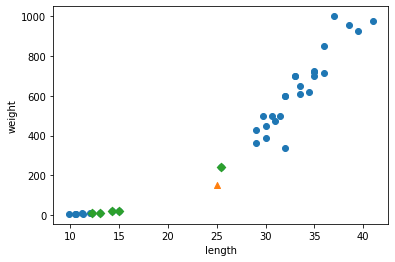

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx[0], 0], train_input[idx[0], 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

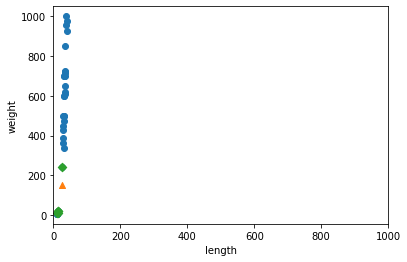

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[idx[0], 0], train_input[idx[0], 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.show()

In [ ]:
train_mean = np.mean(train_input, axis=0)
train_std = np.std(train_input, axis=0)

In [ ]:
train_mean

array([ 27.29722222, 454.09722222])

In [ ]:
train_std

array([  9.98244253, 323.29893931])

In [ ]:
train_scaled = (train_input - train_mean) / train_std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - train_mean) / train_std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [ ]:
accuracy_score(test_target, kn.predict(test_scaled))

1.0

In [ ]:
new_data = ([[25, 100]] - train_mean) / train_std
new_data

array([[-0.23012627, -1.09526255]])

In [ ]:
dist, idx = kn.kneighbors([[-0.23012627, -1.09526255]])

In [ ]:
dist

array([[0.441046  , 0.90682248, 1.02117787, 1.02737233, 1.03194231]])

In [ ]:
idx

array([[21, 14, 32, 34, 33]])

In [ ]:
kn.predict(new_data)

array([1.])

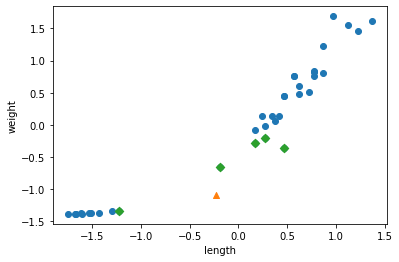

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new_data[0, 0], new_data[0, 1], marker='^')
plt.scatter(train_scaled[idx[0], 0], train_scaled[idx[0], 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()